In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [22]:
data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')

C:\Users\pc\AppData\Local\Temp\ipykernel_8296\3037069856.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


In [23]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


#### Descriptive statistics for numerical features

In [24]:
numerical_columns = ['TotalPremium', 'TotalClaims']  
descriptive_stats = data[numerical_columns].describe()

print(descriptive_stats)

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05


####  Variance, Median, Mode, Range for numerical features

In [25]:
variability = data[numerical_columns].var()
print(variability)

TotalPremium    5.303096e+04
TotalClaims     5.683812e+06
dtype: float64


In [26]:
median = data[numerical_columns].median()
mode = data[numerical_columns].mode()
range_values = data[numerical_columns].max() - data[numerical_columns].min()

print("Median:\n", median)
print("Mode:\n", mode)
print("Range:\n", range_values)

Median:
 TotalPremium    2.178333
TotalClaims     0.000000
dtype: float64
Mode:
    TotalPremium  TotalClaims
0           0.0          0.0
Range:
 TotalPremium     66065.180175
TotalClaims     405094.517544
dtype: float64


#### Review the Data Types

In [27]:
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

#### Convert the columns to their appropriate types

In [28]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

In [29]:
categorical_columns = [
    'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 
    'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 
    'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 
    'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff', 
    'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
    'StatutoryClass', 'StatutoryRiskType'
]

data[categorical_columns] = data[categorical_columns].astype('category')


In [30]:
numeric_columns = ['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']
data[numeric_columns] = data[numeric_columns].astype('float')

In [ ]:
binary_columns = ['CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder']
data[binary_columns] = data[binary_columns].replace({'Yes': True, 'No': False})

In [32]:
print(data.dtypes)

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                       category
LegalType                         category
Title                             category
Language                          category
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                           category
Province                          category
PostalCode                           int64
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                          category
mmcode                             float64
VehicleType                       category
RegistrationYear                     int64
make                              category
Model                             category
Cylinders  

#### Check for Missing Values

In [33]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Filter out columns that have missing values
missing_values = missing_values[missing_values > 0]

print("Columns with missing values:\n", missing_values)

Columns with missing values:
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [34]:
# Calculate percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print("Percentage of missing values in each column:\n", missing_percentage)

Percentage of missing values in each column:
 Bank                        14.594670
AccountType                  4.022806
MaritalStatus                0.825819
Gender                       0.953507
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
Model                        0.055195
Cylinders                    0.055195
cubiccapacity                0.055195
kilowatts                    0.055195
bodytype                     0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
CustomValueEstimate         77.956560
CapitalOutstanding           0.000200
NewVehicle                  15.327998
WrittenOff                  64.183810
Rebuilt                     64.183810
Converted                   64.183810
CrossBorder                 99.930207
NumberOfVehiclesInFleet    100.000000
dtype: float64


In [ ]:
# Fill missing categorical values with mode
data['Bank'].fillna(data['Bank'].mode()[0], inplace=True)
data['AccountType'].fillna(data['AccountType'].mode()[0], inplace=True)
data['MaritalStatus'].fillna(data['MaritalStatus'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [36]:
# Fill missing numerical values with median
numerical_cols = ['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [39]:
data.to_csv('../data/MachineLearningRating_v3.txt', index=False)

####  Histograms for Numerical Columns

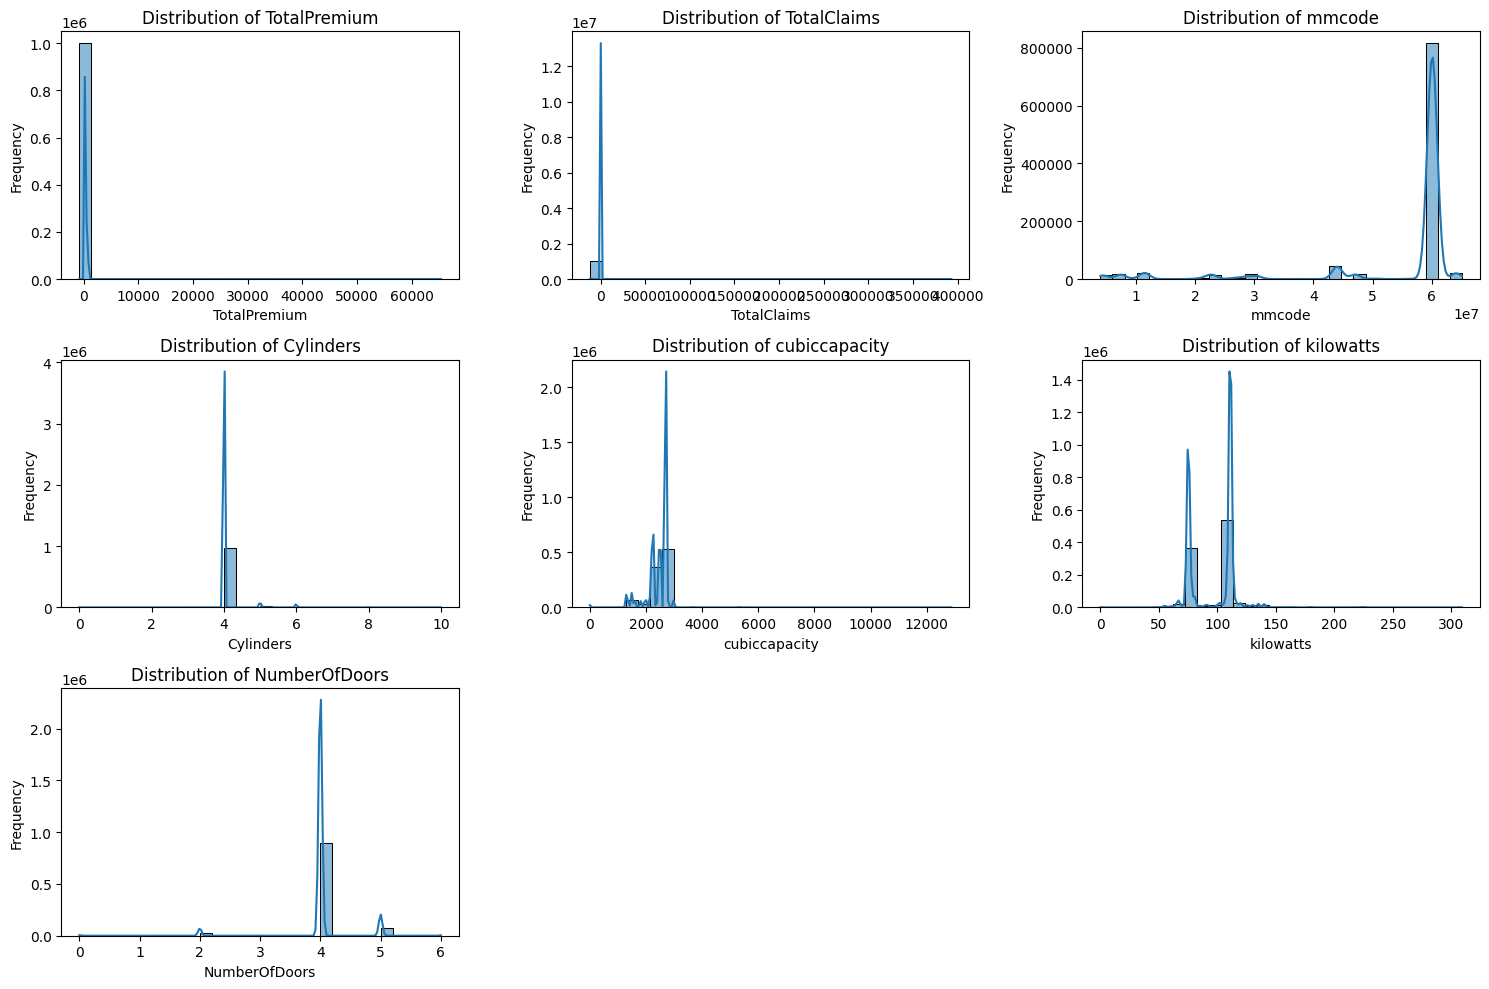

In [29]:
# List of numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'mmcode', 'Cylinders', 
                      'cubiccapacity', 'kilowatts', 'NumberOfDoors']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the layout based on the number of columns
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Bar Charts for Categorical Columns

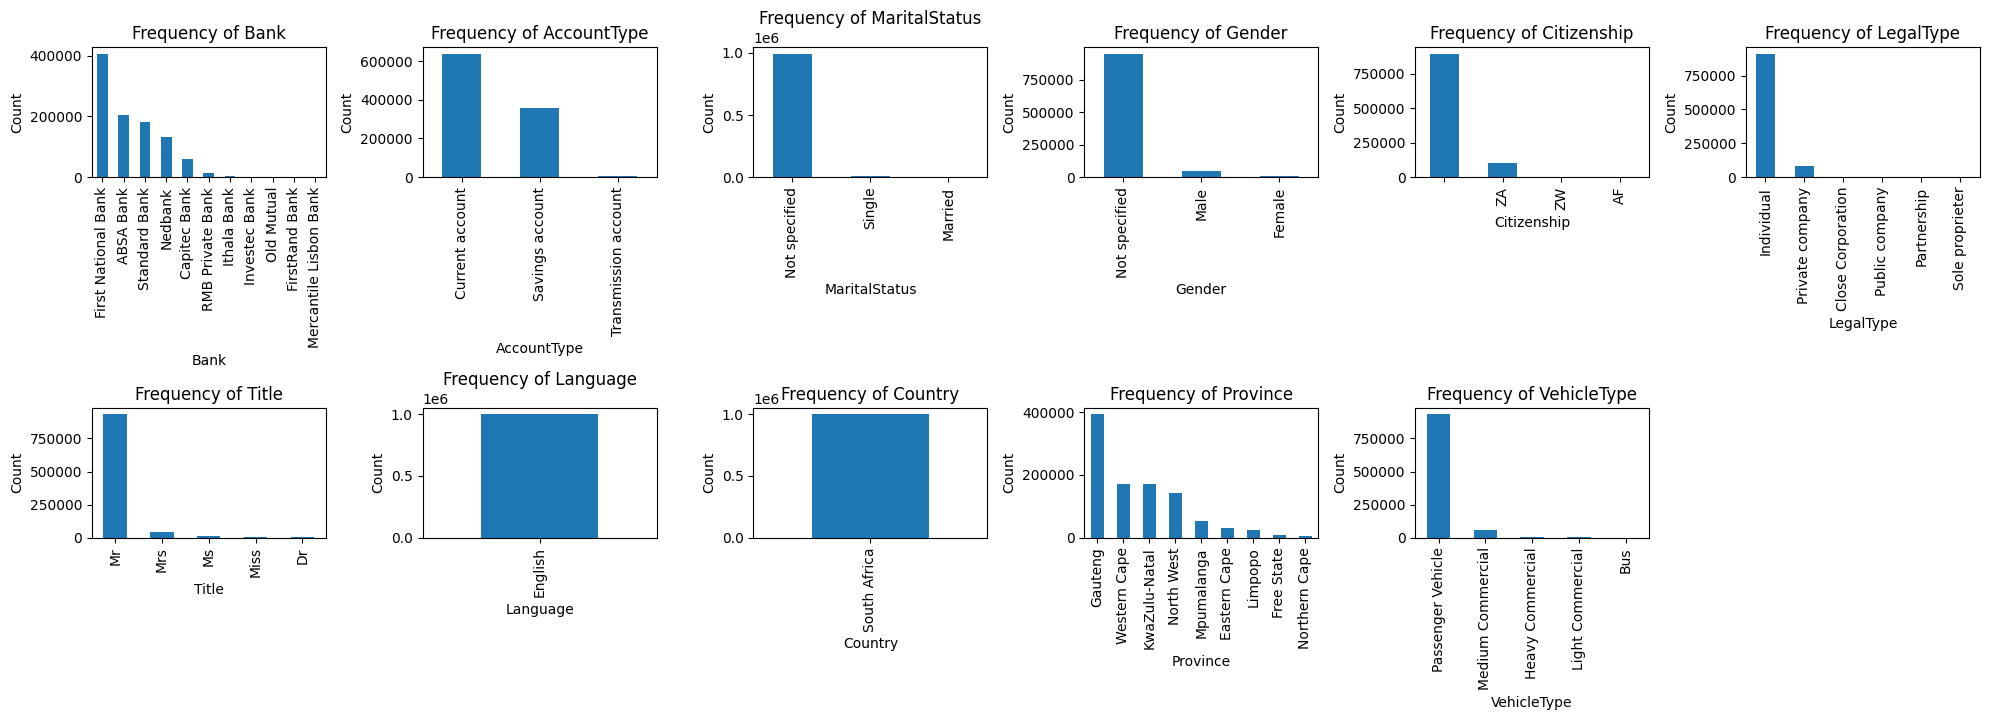

In [34]:
# List of categorical columns
categorical_columns = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 
                        'Citizenship', 'LegalType', 'Title', 'Language', 
                        'Country', 'Province','VehicleType']

# Plot bar charts for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 6, i)  # Adjust the layout based on the number of columns
    data[col].dropna().value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long

plt.tight_layout()
plt.show()

####  Correlations and Associations

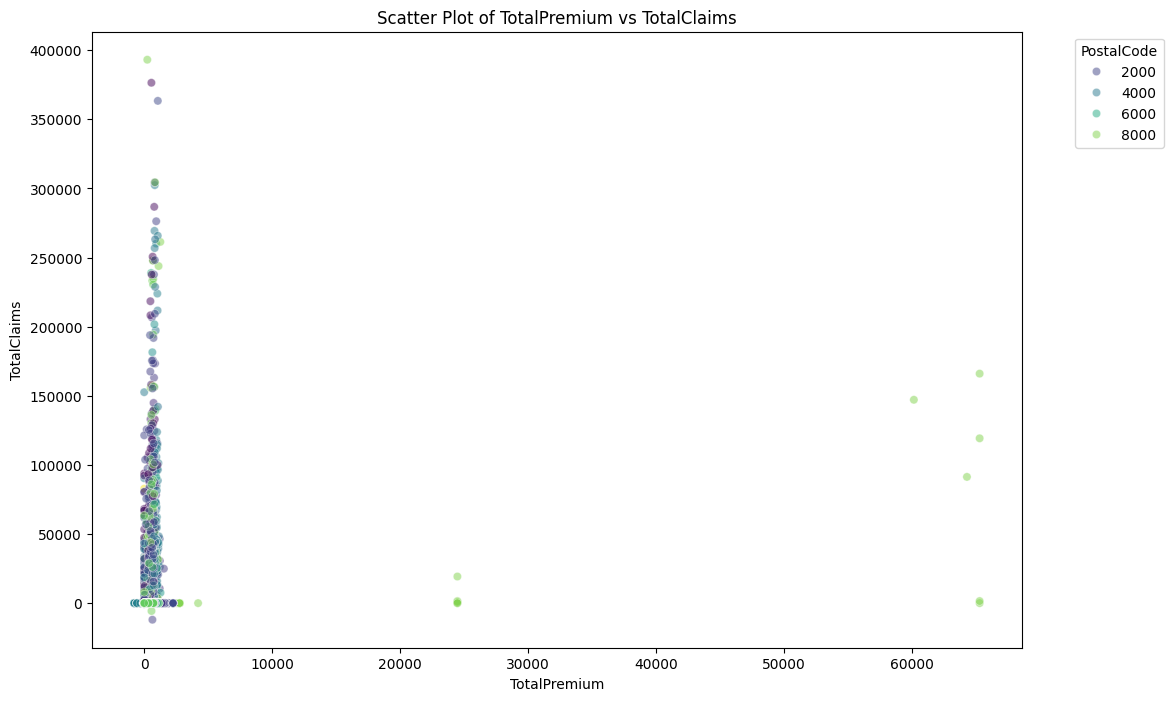

In [35]:
# Plot scatter plot of TotalPremium vs TotalClaims
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis', alpha=0.5)
plt.title('Scatter Plot of TotalPremium vs TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


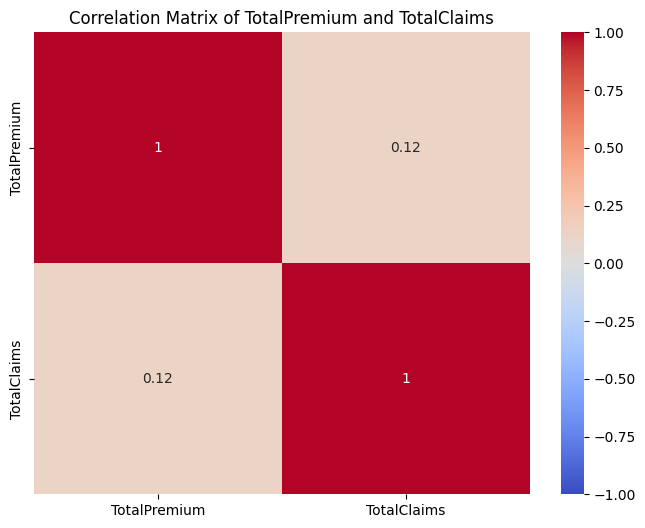

In [36]:
# Calculate the correlation matrix
correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of TotalPremium and TotalClaims')
plt.show()


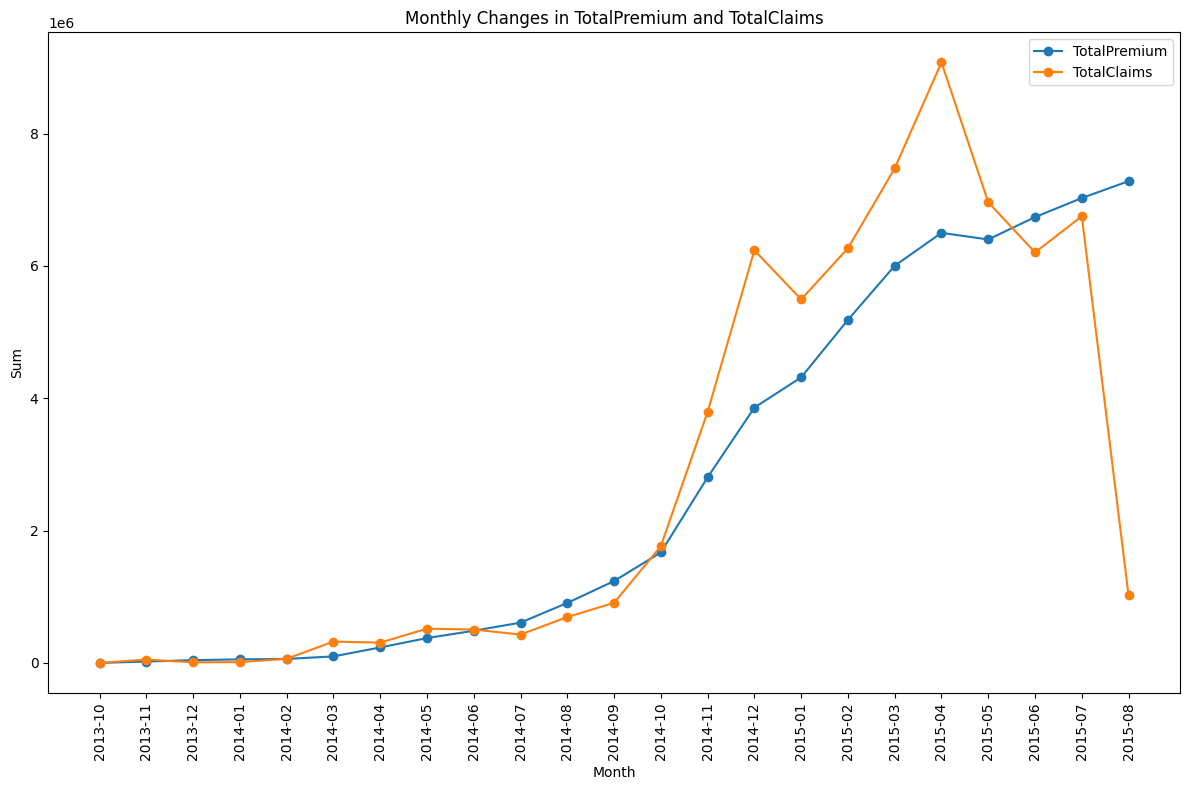

In [37]:
# Ensure TransactionMonth is in datetime format
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

# Aggregate data by month
monthly_data = data.groupby(data['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()

# Plot monthly changes
plt.figure(figsize=(12, 8))
plt.plot(monthly_data['TransactionMonth'].astype(str), monthly_data['TotalPremium'], marker='o', label='TotalPremium')
plt.plot(monthly_data['TransactionMonth'].astype(str), monthly_data['TotalClaims'], marker='o', label='TotalClaims')
plt.title('Monthly Changes in TotalPremium and TotalClaims')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


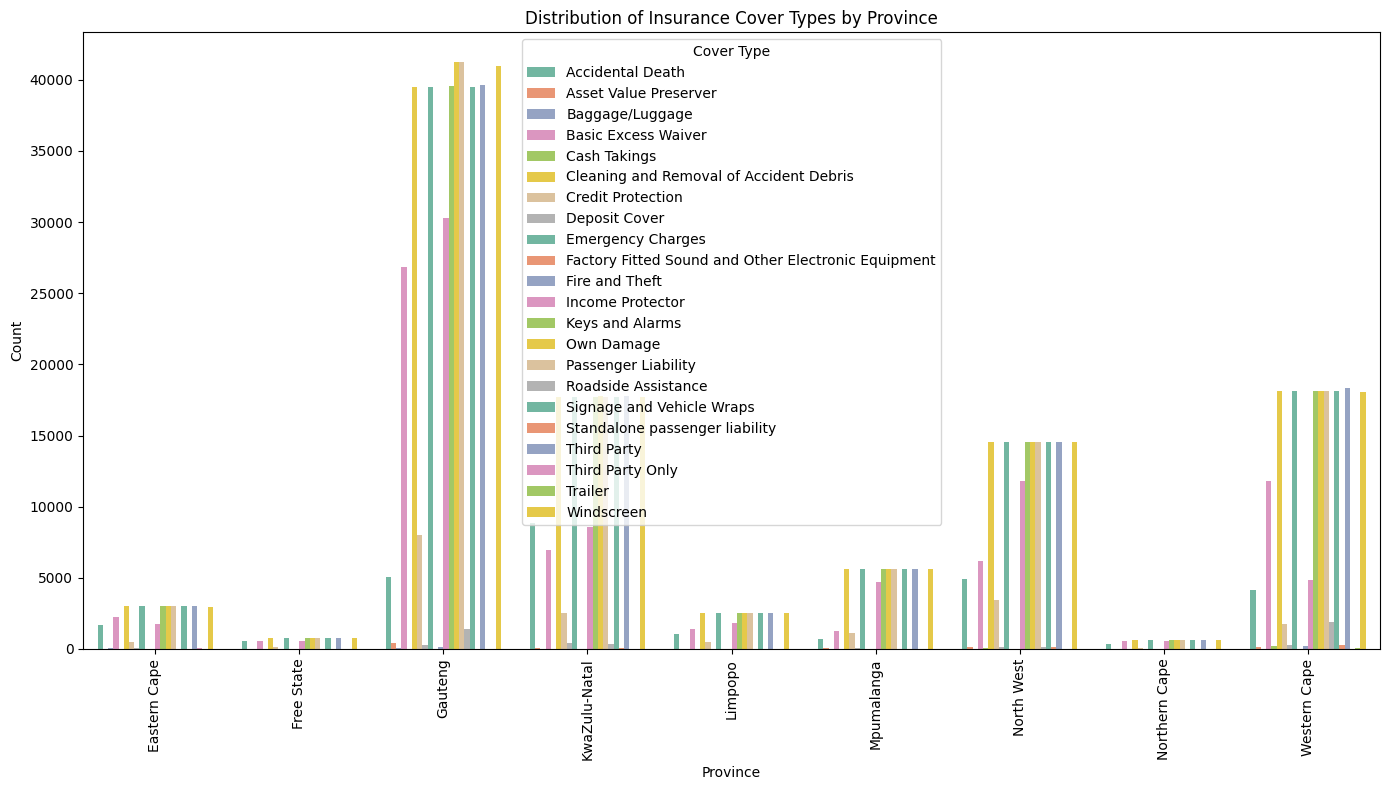

In [38]:
# Plot insurance cover type distribution by Province
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Province', hue='CoverType', palette='Set2')
plt.title('Distribution of Insurance Cover Types by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cover Type')
plt.tight_layout()
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_3364\4123475346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_premium_by_province = data.groupby('Province')['TotalPremium'].mean().reset_index()
C:\Users\pc\AppData\Local\Temp\ipykernel_3364\4123475346.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_premium_by_province, x='Province', y='TotalPremium', palette='viridis')


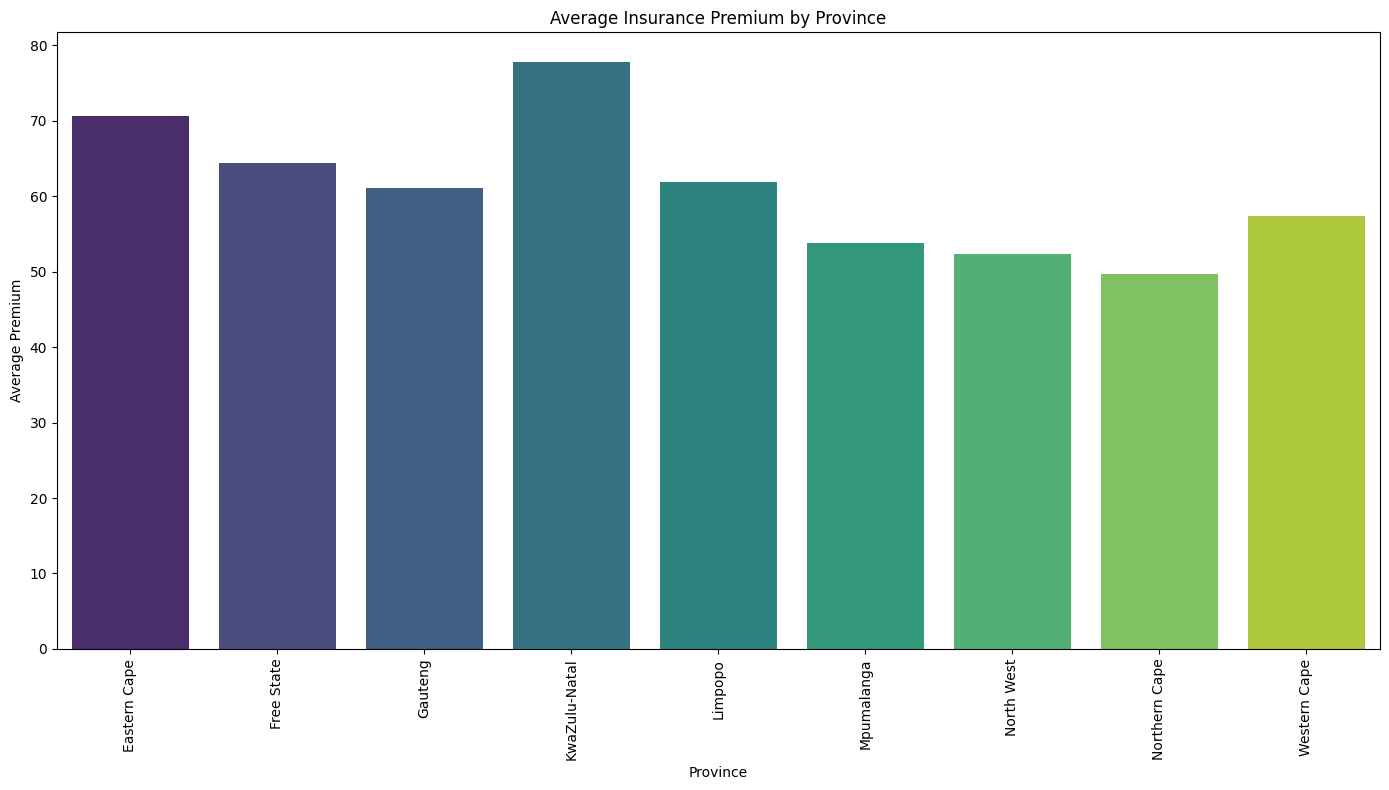

In [39]:
# Calculate average premium by Province
average_premium_by_province = data.groupby('Province')['TotalPremium'].mean().reset_index()

# Plot average premium by Province
plt.figure(figsize=(14, 8))
sns.barplot(data=average_premium_by_province, x='Province', y='TotalPremium', palette='viridis')
plt.title('Average Insurance Premium by Province')
plt.xlabel('Province')
plt.ylabel('Average Premium')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


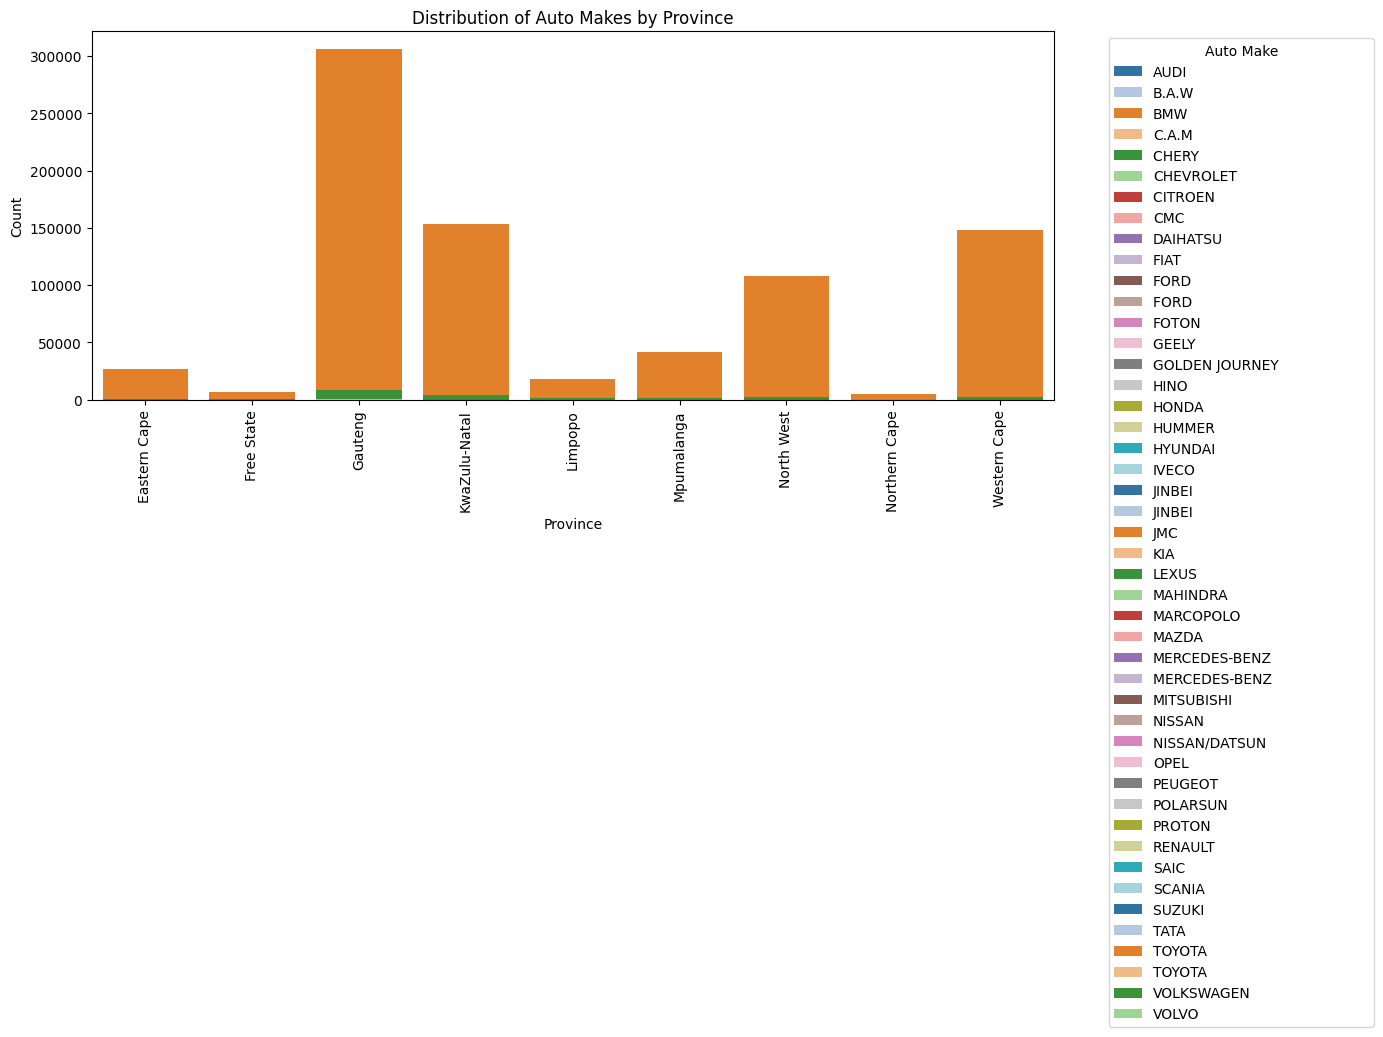

In [40]:
# Plot auto makes distribution by Province
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Province', hue='make', palette='tab20', dodge=False)
plt.title('Distribution of Auto Makes by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Auto Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


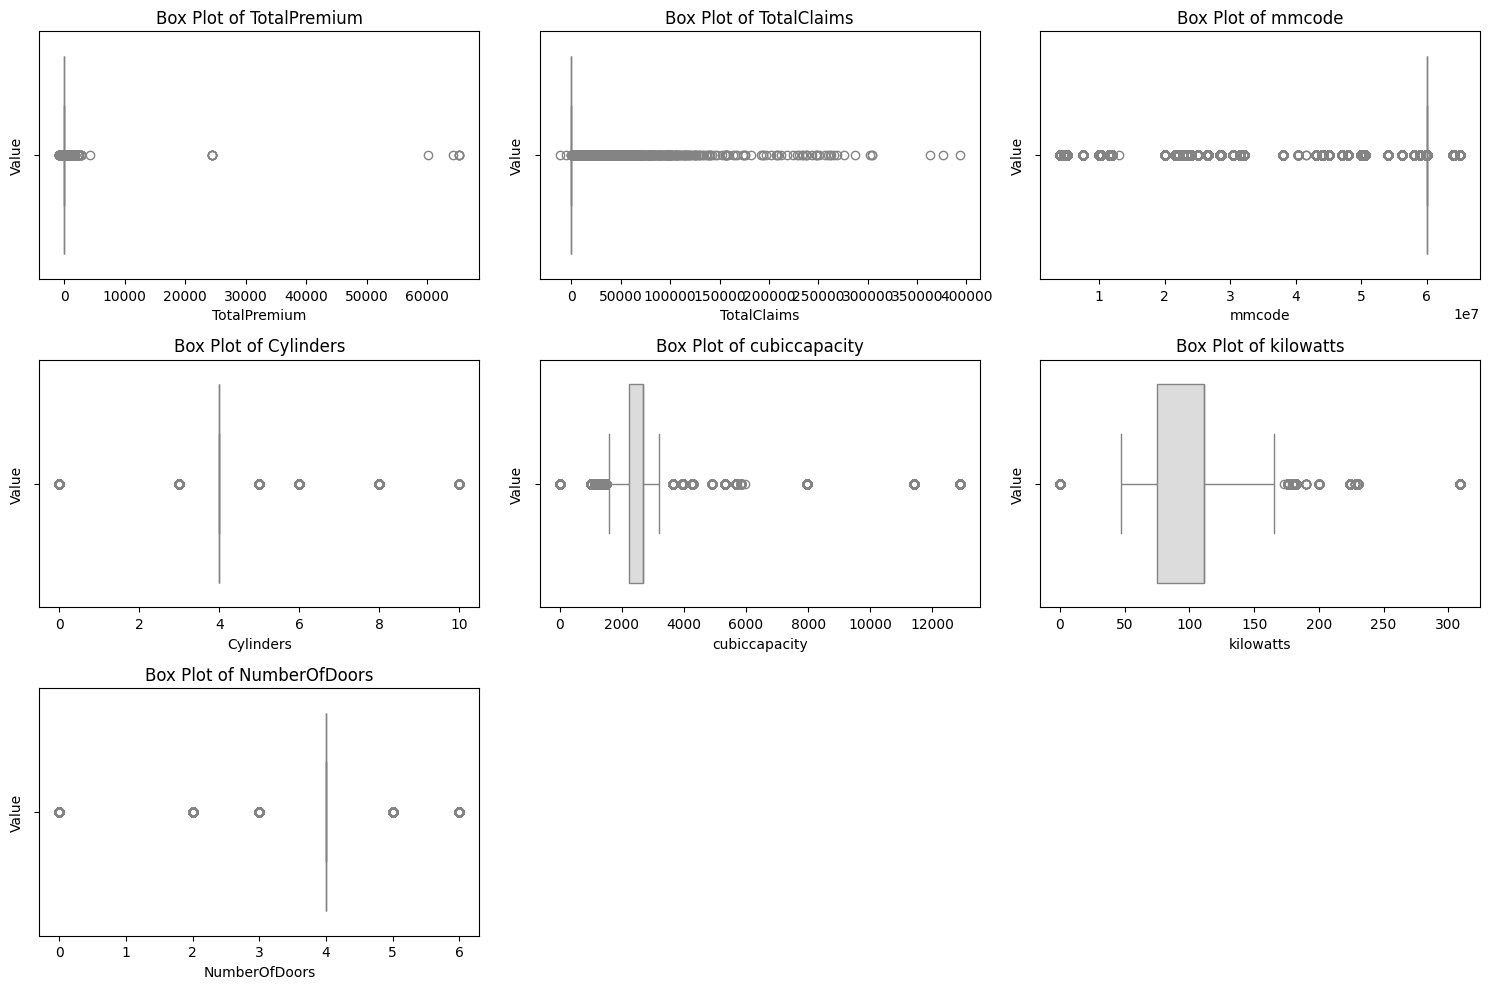

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dummy variable for hue
data['dummy_hue'] = 'all'

# List of numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'mmcode', 'Cylinders', 
                      'cubiccapacity', 'kilowatts', 'NumberOfDoors']

# Plot box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], hue=data['dummy_hue'], palette='coolwarm', legend=False)  
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [46]:
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column
for col in numerical_columns:
    data = remove_outliers(data, col)

# Check the shape of the cleaned DataFrame
print(data.shape)

(591266, 50)


####  Trends in Total Premium and Claims Over Time

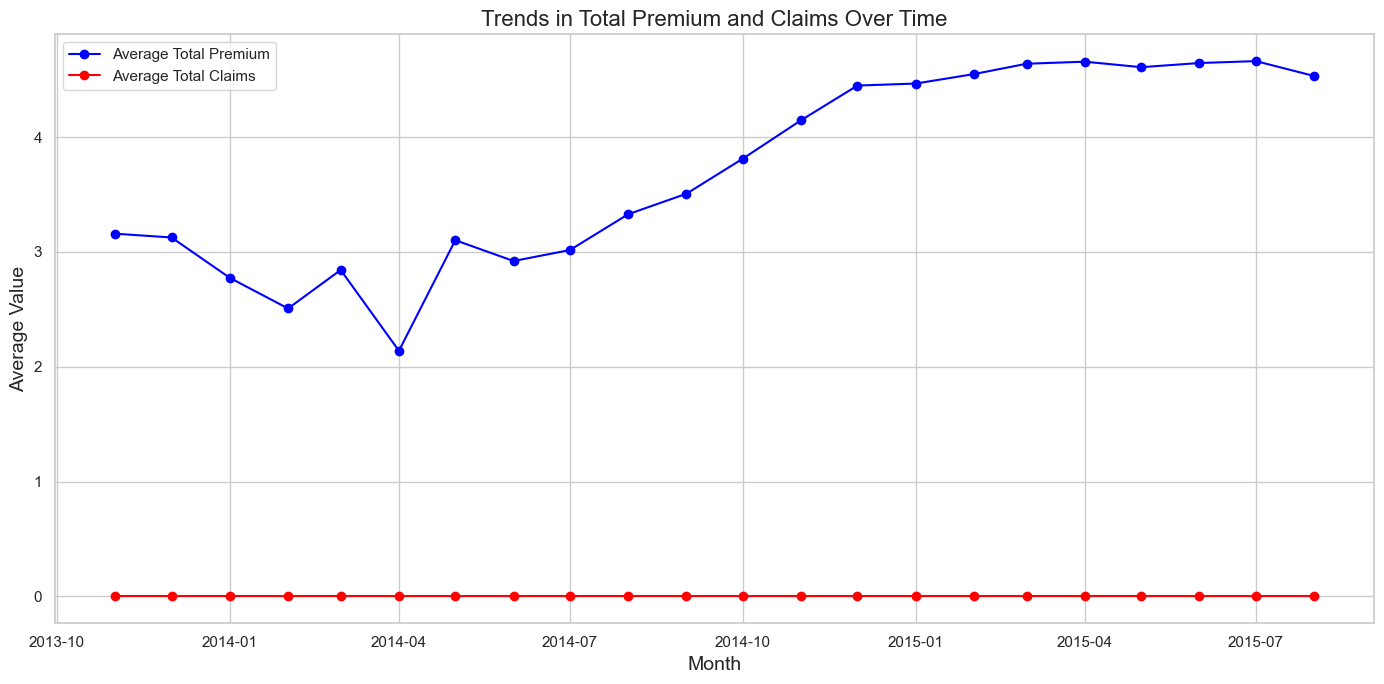

In [51]:
# Convert TransactionMonth to datetime
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

# Aggregate data by month
monthly_data = data.groupby(data['TransactionMonth']).agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).reset_index()

# Plot trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['TransactionMonth'], monthly_data['TotalPremium'], label='Average Total Premium', color='blue', marker='o')
plt.plot(monthly_data['TransactionMonth'], monthly_data['TotalClaims'], label='Average Total Claims', color='red', marker='o')
plt.title('Trends in Total Premium and Claims Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()